In [ ]:
## GRAFICO DAS NOTAS DO IMDB 

[Text(0.5, 0, 'IMDB'), Text(0, 0.5, 'Nº de ocorrências')]

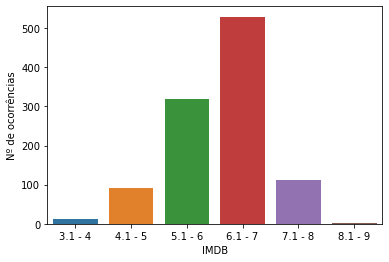

In [236]:
#A função a seguir servirá para corrigir os valores das Notas do IMBD:
def inteirar (n):
    return int(n)

#Adicionando a coluna rate_break dos intervalos das notas:
count_rate = df_final
count_rate = count_rate['rate'].apply(inteirar)

count_rate['rate_break'] = count_rate.apply(n_break, args = (0, 1, 1, False))

#Contando a frequência de cada intervalo:
count_rate = count_rate.groupby(['rate_break']).size()

#Visualização:
graph_rate = sns.barplot(x = count_rate.index, y = count_rate.values)
graph_rate.set(xlabel = 'IMDB', ylabel = 'Nº de ocorrências')

Em ordem:

In [239]:
display(count_rate.sort_values(ascending = False))

rate
6.1 - 7    529
5.1 - 6    318
7.1 - 8    111
4.1 - 5     91
3.1 - 4     12
8.1 - 9      1
Name: rate, dtype: int64

RESPOSTA DA PERGUNTA 2: 


Utilizar o "Certified Fresh" e o "Upright" para categorizar um filme como bem recebido no Tomatometer e nas notas dos usuários do site:

In [406]:
df_cut = df_final[df_final['tomatometer_status'] == 'Certified-Fresh']
df_cut = df_cut[df_cut['audience_status'] == 'Upright']
df_cut.reset_index(inplace = True, drop = False)
for col in df_cut.columns:
    if 'index' in col:
        del df_cut[col]
    elif 'level_0' in col:
        del df_cut[col]        
df_cut.head(5)

,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,Oscar_Best_Actor_won,Oscar_Best_Actress_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating
0,2002,Frida,R,123,Biography|Drama|Romance,7.4,63852,61.0,No,No,No,No,Certified-Fresh,75.0,Upright,85.0
1,2001,The Lord of the Rings: The Fellowship of the Ring,PG-13,178,Adventure|Drama|Fantasy,8.8,1286275,92.0,No,No,No,No,Certified-Fresh,91.0,Upright,95.0
2,2005,Star Wars: Episode III - Revenge of the Sith,PG-13,140,Action|Adventure|Fantasy,7.6,543318,68.0,No,No,No,No,Certified-Fresh,80.0,Upright,66.0
3,2001,Shrek,PG,90,Animation|Adventure|Comedy,7.9,483447,84.0,No,No,No,No,Certified-Fresh,88.0,Upright,90.0
4,2001,Planet of the Apes,PG-13,119,Action|Adventure|Sci-Fi,5.7,181213,50.0,No,No,No,No,Certified-Fresh,87.0,Upright,87.0


In [ ]:
##CORREÇÃO DO TERCEIRO E QUARTO WARNINGs
##A linha 'df_oscars = df_oscars.drop(labels=15, axis=0)' foi pq moonlight tava duplicado

In [402]:
#Pegando os vencedores da categoria no dataframe:

df_oscars = df_final[(df_final.Oscar_Best_Picture_won == 'Yes')]
df_oscars.reset_index(inplace = True, drop = False)

for col in df_oscars.columns:
    if 'index' in col:
        del df_oscars[col]
    elif 'level_0' in col:
        del df_oscars[col]

df_oscars = df_oscars.drop(labels=15, axis=0)
print(df_oscars.shape[0])
df_oscars

15


,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,Oscar_Best_Actor_won,Oscar_Best_Actress_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating
0,2003,The Lord of the Rings: The Return of the King,PG-13,201,Adventure|Drama|Fantasy,8.9,1264277,94.0,Yes,Yes,No,No,Certified-Fresh,93.0,Upright,86.0
1,2001,A Beautiful Mind,PG-13,135,Biography|Drama,8.2,640458,72.0,Yes,Yes,No,No,Certified-Fresh,74.0,Upright,93.0
2,2002,Chicago,PG-13,113,Comedy|Crime|Musical,7.2,176942,82.0,Yes,No,No,No,Certified-Fresh,86.0,Upright,83.0
3,2004,Crash,R,112,Crime|Drama|Thriller,7.8,368775,69.0,Yes,No,No,No,Certified-Fresh,74.0,Upright,88.0
4,2004,Million Dollar Baby,PG-13,132,Drama|Sport,8.1,501680,86.0,Yes,Yes,No,Yes,Certified-Fresh,91.0,Upright,90.0
5,2006,The Departed,R,151,Crime|Drama|Thriller,8.5,910945,85.0,Yes,Yes,No,No,Certified-Fresh,91.0,Upright,94.0
6,2007,No Country for Old Men,R,122,Crime|Drama|Thriller,8.1,640561,91.0,Yes,Yes,No,No,Certified-Fresh,93.0,Upright,86.0
7,2008,The Hurt Locker,R,131,Drama|History|Thriller,7.6,343364,94.0,Yes,Yes,No,No,Certified-Fresh,97.0,Upright,84.0
8,2008,Slumdog Millionaire,R,120,Drama,8.0,661819,86.0,Yes,Yes,No,No,Certified-Fresh,91.0,Upright,90.0
9,2012,Argo,R,120,Biography|Drama|History,7.7,468444,86.0,Yes,No,No,No,Certified-Fresh,96.0,Upright,90.0


In [403]:
import warnings
warnings.filterwarnings('ignore')

def zero_a_cem (a):
    return round(a * 10, 1)

def compare (a, b, c, d):
    if (a > b and a > c and a > d):
        return 'Tomatometer'
    elif (b > a and b > c and b > d):
        return 'Audience Rating - RT'
    elif (c > a and c > b and c > d):
        return 'Metascore'
    elif (d > a and d > b and d > c):
        return 'IMDb Rate'
    else:
        return 'Draw'

df_oscars['rate'] = df_oscars['rate'].apply(zero_a_cem)
df_oscars['indicator'] = df_oscars.apply(lambda x: compare(x["tomatometer_rating"], x["audience_rating"], x['metascore'], x['rate']), axis = 1)
df_oscars

,year,movie,certificate,duration,genre,rate,votes,metascore,Oscar_Best_Picture_won,Oscar_Best_Director_won,Oscar_Best_Actor_won,Oscar_Best_Actress_won,tomatometer_status,tomatometer_rating,audience_status,audience_rating,indicator
0,2003,The Lord of the Rings: The Return of the King,PG-13,201,Adventure|Drama|Fantasy,89.0,1264277,94.0,Yes,Yes,No,No,Certified-Fresh,93.0,Upright,86.0,Metascore
1,2001,A Beautiful Mind,PG-13,135,Biography|Drama,82.0,640458,72.0,Yes,Yes,No,No,Certified-Fresh,74.0,Upright,93.0,Audience Rating - RT
2,2002,Chicago,PG-13,113,Comedy|Crime|Musical,72.0,176942,82.0,Yes,No,No,No,Certified-Fresh,86.0,Upright,83.0,Tomatometer
3,2004,Crash,R,112,Crime|Drama|Thriller,78.0,368775,69.0,Yes,No,No,No,Certified-Fresh,74.0,Upright,88.0,Audience Rating - RT
4,2004,Million Dollar Baby,PG-13,132,Drama|Sport,81.0,501680,86.0,Yes,Yes,No,Yes,Certified-Fresh,91.0,Upright,90.0,Tomatometer
5,2006,The Departed,R,151,Crime|Drama|Thriller,85.0,910945,85.0,Yes,Yes,No,No,Certified-Fresh,91.0,Upright,94.0,Audience Rating - RT
6,2007,No Country for Old Men,R,122,Crime|Drama|Thriller,81.0,640561,91.0,Yes,Yes,No,No,Certified-Fresh,93.0,Upright,86.0,Tomatometer
7,2008,The Hurt Locker,R,131,Drama|History|Thriller,76.0,343364,94.0,Yes,Yes,No,No,Certified-Fresh,97.0,Upright,84.0,Tomatometer
8,2008,Slumdog Millionaire,R,120,Drama,80.0,661819,86.0,Yes,Yes,No,No,Certified-Fresh,91.0,Upright,90.0,Tomatometer
9,2012,Argo,R,120,Biography|Drama|History,77.0,468444,86.0,Yes,No,No,No,Certified-Fresh,96.0,Upright,90.0,Tomatometer
